In [1]:
import sklearn 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
from sklearn.metrics import pairwise_distances_argmin
#you can use Python’s imaging library (PIL)
from PIL import Image
from IPython.display import display
import scipy.cluster.hierarchy as sch #you only for sch.dendrogram

 ## Use sklearn library to generate the synthetic data for k-means clustering.

In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=4)

In [3]:
X

array([[ 3.26478718e+00, -5.56939581e+00],
       [ 8.66976400e+00,  4.10979732e+00],
       [ 1.06349188e+01,  5.30006373e+00],
       [ 1.01653527e+01,  6.74019238e-01],
       [ 9.35101820e+00,  4.40689073e+00],
       [ 4.56270653e+00, -5.40246102e+00],
       [ 9.48947453e+00, -9.66084675e+00],
       [ 9.51888151e+00,  3.67578903e-01],
       [ 9.74487768e+00,  1.56051796e+00],
       [ 4.22717021e+00, -5.92689435e+00],
       [ 1.00217271e+01, -9.59024741e+00],
       [ 8.52789299e+00, -1.04889198e+01],
       [ 7.91273162e+00,  5.80034769e-01],
       [ 1.02822681e+01,  3.11326803e+00],
       [ 8.94986128e+00,  1.27011577e+00],
       [ 5.57755455e+00, -5.62417765e+00],
       [ 1.04842428e+01, -9.75255780e+00],
       [ 9.21345141e+00,  4.68590856e+00],
       [ 3.41113292e+00, -5.85555494e+00],
       [ 9.36377791e+00,  6.56135498e-01],
       [ 9.06946470e+00, -9.78783686e+00],
       [ 9.33968610e+00,  5.34358658e+00],
       [ 9.53439747e+00,  5.41805919e+00],
       [ 8.

In [4]:
y

array([2, 1, 1, 0, 1, 2, 3, 0, 0, 2, 3, 3, 0, 1, 0, 2, 3, 1, 2, 0, 3, 1,
       1, 3, 2, 3, 2, 1, 1, 1, 2, 0, 2, 3, 1, 3, 1, 3, 2, 0, 3, 1, 1, 2,
       3, 2, 3, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2, 3, 2, 2, 1, 0, 3, 1, 3,
       0, 2, 3, 1, 1, 3, 1, 3, 0, 3, 2, 0, 3, 2, 0, 0, 0, 2, 3, 0, 2, 2,
       1, 0, 1, 2, 2, 1, 1, 3, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 1, 3, 0, 3,
       0, 2, 1, 1, 1, 1, 3, 1, 3, 1, 3, 0, 1, 0, 0, 1, 0, 1, 2, 3, 2, 1,
       2, 1, 0, 0, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 0, 1, 0, 3,
       2, 1, 1, 2, 0, 3, 1, 2, 2, 1, 2, 3, 2, 0, 1, 0, 2, 2, 1, 0, 1, 3,
       1, 3, 3, 3, 3, 2, 1, 3, 1, 2, 3, 1, 0, 3, 2, 2, 3, 0, 0, 3, 3, 2,
       1, 1, 0, 2, 0, 3, 1, 3, 0, 1, 3, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 0,
       0, 3, 2, 0, 1, 0, 1, 3, 3, 3, 0, 0, 1, 3, 3, 0, 3, 3, 2, 2, 1, 0,
       2, 0, 3, 3, 2, 1, 2, 2, 0, 3, 2, 0, 3, 0, 1, 1, 0, 2, 3, 2, 0, 3,
       3, 3, 3, 1, 3, 2, 2, 2, 0, 0, 3, 3, 2, 0, 0, 3, 1, 1, 1, 0, 0, 3,
       2, 1, 0, 0, 2, 2, 0, 3, 3, 0, 1, 0, 2, 1])

## Plot the generated data with labels by using matplotlib

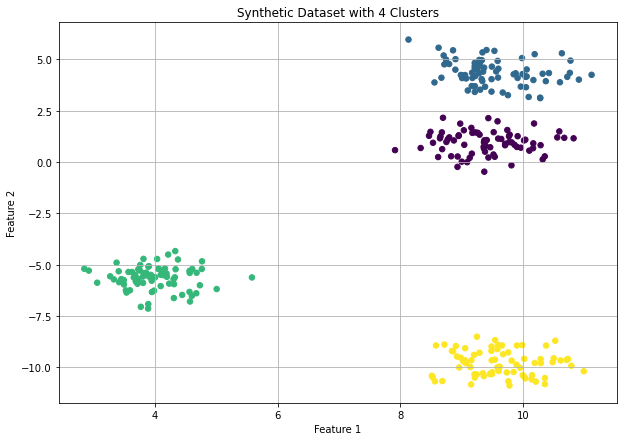

In [5]:
# Plot generated data
plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.title("Synthetic Dataset with 4 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## K-means Immplementation
### Fitting the model on the dataset (with default seed & seed = 2) and plot the figure

In [6]:
class KMeans:
    def __init__(self, n_clusters=4, n_iterations=100, seed=None):
        self.n_clusters = n_clusters
        self.n_iterations = n_iterations
        self.seed = seed
        self.centroids = None

    def _update_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i] = X[labels == i].mean(axis=0)
        return centroids

    def fit(self, X):
        np.random.seed(self.seed)
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.n_iterations):
            labels = pairwise_distances_argmin(X, self.centroids)
            new_centroids = self._update_centroids(X, labels)
            
            if np.all(new_centroids == self.centroids):break
            self.centroids = new_centroids
        self.labels_ = labels

    def predict(self, X):
        return (pairwise_distances_argmin(X, self.centroids), self.centroids)

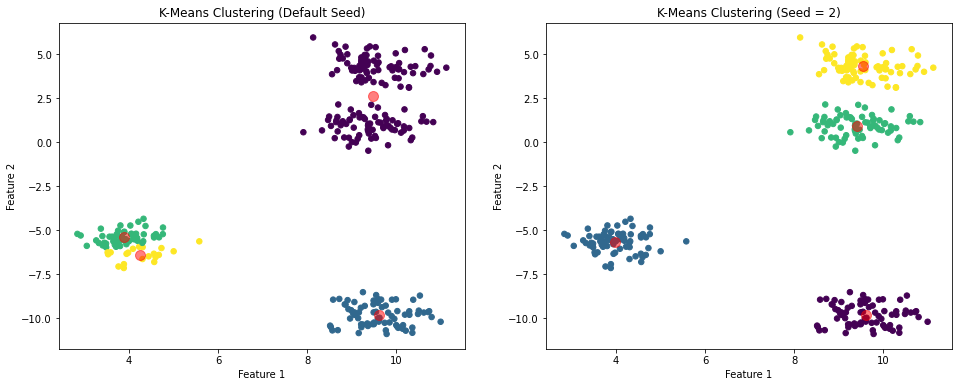

In [7]:
# Default seed fitting
kmeans_default = KMeans(seed=None)
kmeans_default.fit(X)
labels_default, centers_default = kmeans_default.predict(X)

# Seed = 2 fitting
kmeans_seed2 = KMeans(seed=2)
kmeans_seed2.fit(X)
labels_seed2, centers_seed2 = kmeans_seed2.predict(X)

# Plotting the results for default seed and seed = 2
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Default seed plot
ax[0].scatter(X[:, 0], X[:, 1], c=labels_default, s=30, cmap='viridis')
ax[0].scatter(centers_default[:, 0], centers_default[:, 1], c='red', s=100, alpha=0.5)
ax[0].set_title('K-Means Clustering (Default Seed)')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Seed = 2 plot
ax[1].scatter(X[:, 0], X[:, 1], c=labels_seed2, s=30, cmap='viridis')
ax[1].scatter(centers_seed2[:, 0], centers_seed2[:, 1], c='red', s=100, alpha=0.5)
ax[1].set_title('K-Means Clustering (Seed = 2)')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

plt.show()

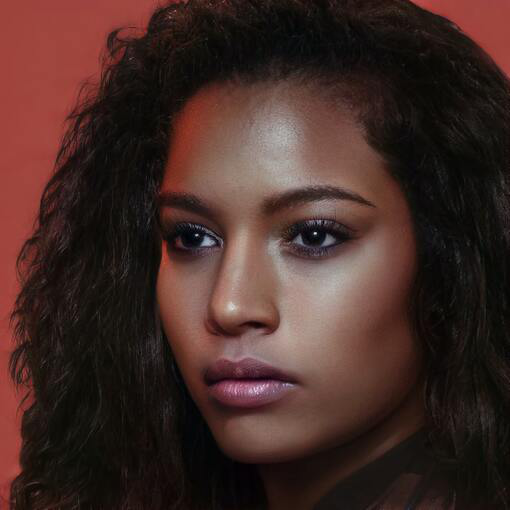

In [8]:
image_path = 'cropped.jpg'
image = Image.open(image_path)

display(image) 

In [9]:
pixels = np.array(image.getdata())
pixels.shape

(260100, 3)

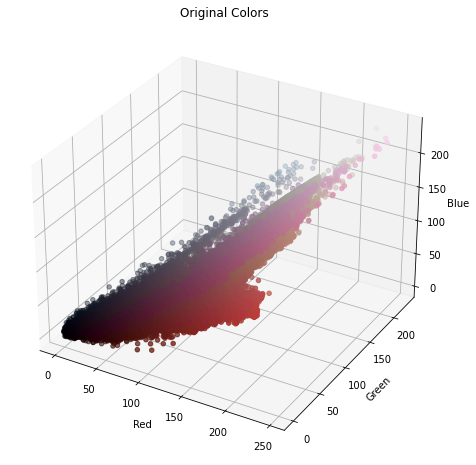

In [10]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')  # '111' means 1x1 grid, first subplot
scatter = ax.scatter(pixels[:, 0], pixels[:, 1], pixels[:, 2], c=pixels/255.0)
ax.set_title('Original Colors')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

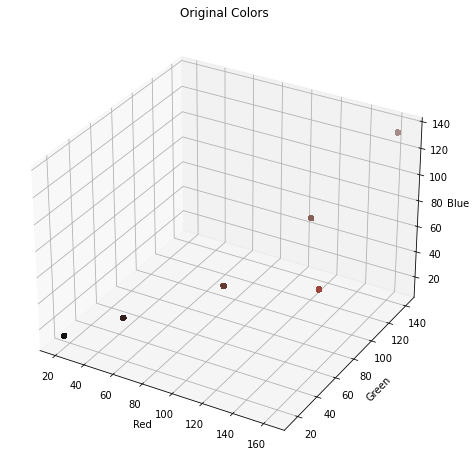

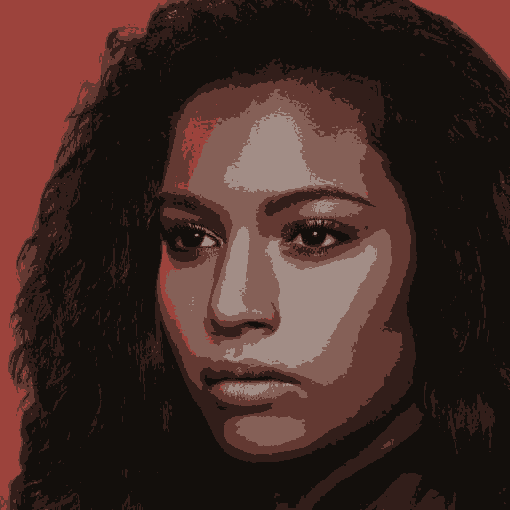

In [11]:
# Default seed fitting
kmeans_default = KMeans(n_clusters=6, seed=None)
kmeans_default.fit(pixels)
labels_default, centers_default = kmeans_default.predict(pixels)

# Replacing each pixel's color with the color of the cluster center
pixels_clustered = np.array([centers_default[label] for label in labels_default])

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')  # '111' means 1x1 grid, first subplot
scatter = ax.scatter(pixels_clustered[:, 0], pixels_clustered[:, 1], pixels_clustered[:, 2], c=pixels_clustered/255.0)
ax.set_title('Original Colors')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

# the clustered center image
width, height = image.size
clustered_image_array = pixels_clustered.reshape((height, width, 3))  # Reshape to original dimensions
pixels_uint8 = clustered_image_array.astype(np.uint8)
clustered_image = Image.fromarray(pixels_uint8)  # Convert array back to an image
display(clustered_image)

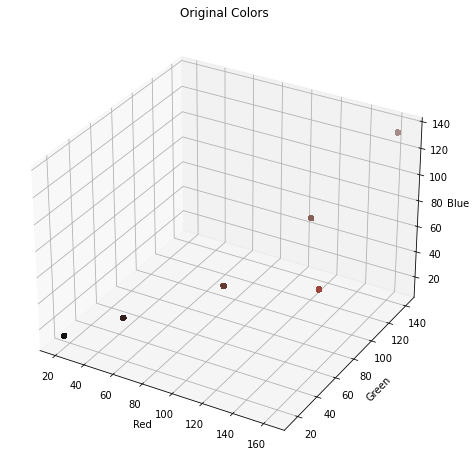

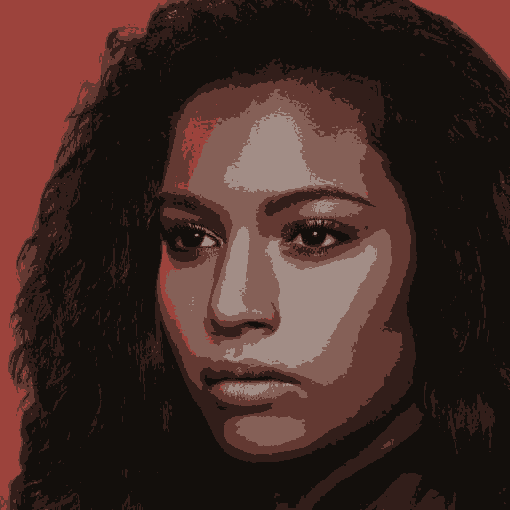

In [12]:
# Seed = 2 fitting
kmeans_seed2 = KMeans(n_clusters=6, seed=2)
kmeans_seed2.fit(pixels)
labels_seed2, centers_seed2 = kmeans_seed2.predict(pixels)

# Replacing each pixel's color with the color of the cluster center
pixels_clustered = np.array([centers_seed2[label] for label in labels_seed2])

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')  # '111' means 1x1 grid, first subplot
scatter = ax.scatter(pixels_clustered[:, 0], pixels_clustered[:, 1], pixels_clustered[:, 2], c=pixels_clustered/255.0)
ax.set_title('Original Colors')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

# the clustered center image
width, height = image.size
clustered_image_array = pixels_clustered.reshape((height, width, 3))  # Reshape to original dimensions
pixels_uint8 = clustered_image_array.astype(np.uint8)
clustered_image = Image.fromarray(pixels_uint8)  # Convert array back to an image
display(clustered_image)

## K-means++ Immplementation
### Fitting the model on the dataset (with default seed & seed = 2) and plot the figure

In [13]:
class KMeans_plusplus:
    def __init__(self, n_clusters=4, n_iterations=100, seed=None):
        self.n_clusters = n_clusters
        self.n_iterations = n_iterations
        self.seed = seed
        self.centroids = None

    def _initialize_centroids_plusplus(self, X):
        np.random.seed(self.seed)
        # Step 1: Randomly choose the first centroid from the data points
        centroids = [X[np.random.choice(len(X))]] 
        # Step 2-4: K-means++ initialization
        for _ in range(1, self.n_clusters):
            # Compute distances from the nearest centroid
            distances = np.array([min(np.sum((c - x)**2) for c in centroids) for x in X])
            # Choose the next centroid
            next_centroid = X[np.argmax(distances)]
            centroids.append(next_centroid)
        return np.array(centroids)

    def _update_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i] = X[labels == i].mean(axis=0)
        return centroids

    def fit(self, X):
        np.random.seed(self.seed)
        self.centroids = self._initialize_centroids_plusplus(X)
        
        for _ in range(self.n_iterations):
            labels = pairwise_distances_argmin(X, self.centroids)
            new_centroids = self._update_centroids(X, labels)
            
            if np.all(new_centroids == self.centroids):break
            self.centroids = new_centroids
            
        self.labels_ = labels
        
    def predict(self, X):
        return (pairwise_distances_argmin(X, self.centroids), self.centroids)

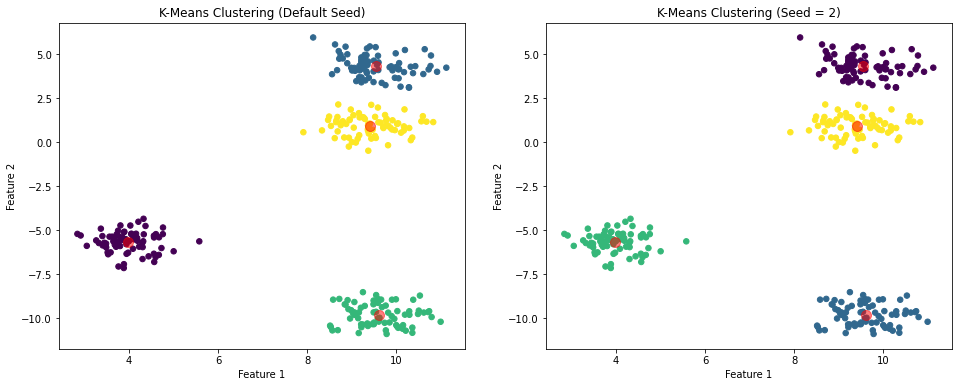

In [14]:
# Default seed (None) fitting
kmeans_default = KMeans_plusplus(seed=None)
kmeans_default.fit(X)
labels_default, centers_default = kmeans_default.predict(X)

# Seed = 2 fitting
kmeans_seed2 = KMeans_plusplus(seed=2)
kmeans_seed2.fit(X)
labels_seed2, centers_seed2 = kmeans_seed2.predict(X)

# Plotting the results for default seed and seed = 2
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Default seed plot
ax[0].scatter(X[:, 0], X[:, 1], c=labels_default, s=30, cmap='viridis')
ax[0].scatter(centers_default[:, 0], centers_default[:, 1], c='red', s=100, alpha=0.5)
ax[0].set_title('K-Means Clustering (Default Seed)')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Seed = 2 plot
ax[1].scatter(X[:, 0], X[:, 1], c=labels_seed2, s=30, cmap='viridis')
ax[1].scatter(centers_seed2[:, 0], centers_seed2[:, 1], c='red', s=100, alpha=0.5)
ax[1].set_title('K-Means Clustering (Seed = 2)')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

plt.show()

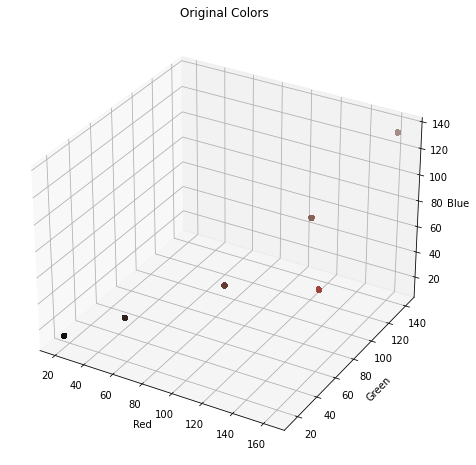

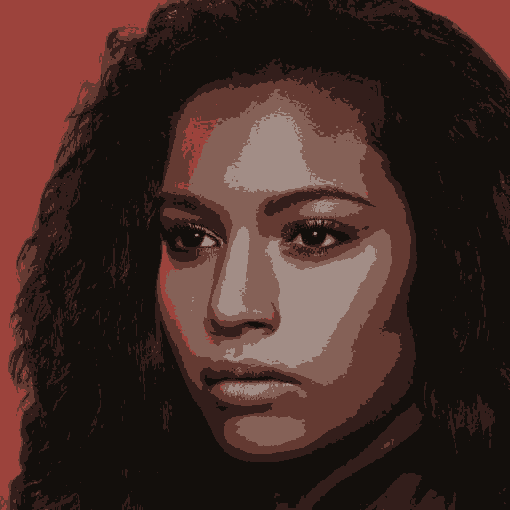

In [15]:
# Default seed fitting
kmeans_default = KMeans_plusplus(n_clusters=6, seed=None)
kmeans_default.fit(pixels)
labels_default, centers_default = kmeans_default.predict(pixels)

# Replacing each pixel's color with the color of the cluster center
pixels_clustered = np.array([centers_default[label] for label in labels_default])

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')  # '111' means 1x1 grid, first subplot
scatter = ax.scatter(pixels_clustered[:, 0], pixels_clustered[:, 1], pixels_clustered[:, 2], c=pixels_clustered/255.0)
ax.set_title('Original Colors')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

# the clustered center image
width, height = image.size
clustered_image_array = pixels_clustered.reshape((height, width, 3))  # Reshape to original dimensions
pixels_uint8 = clustered_image_array.astype(np.uint8)
clustered_image = Image.fromarray(pixels_uint8)  # Convert array back to an image
display(clustered_image)

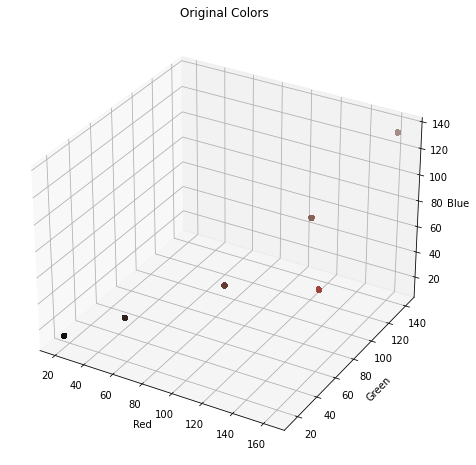

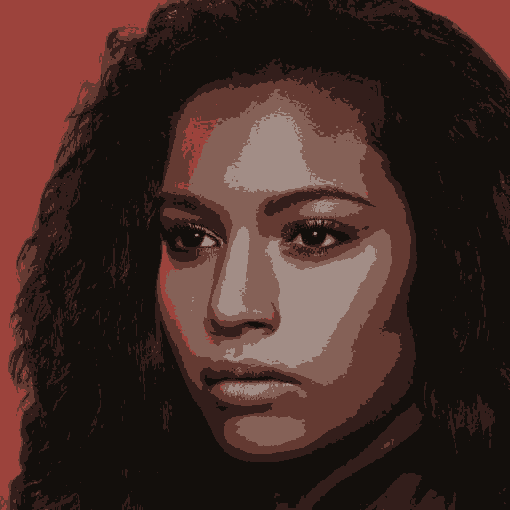

In [16]:
# Seed = 2 fitting
kmeans_seed2 = KMeans_plusplus(n_clusters=6, seed=2)
kmeans_seed2.fit(pixels)
labels_seed2, centers_seed2 = kmeans_seed2.predict(pixels)

# Replacing each pixel's color with the color of the cluster center
pixels_clustered = np.array([centers_seed2[label] for label in labels_seed2])

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')  # '111' means 1x1 grid, first subplot
scatter = ax.scatter(pixels_clustered[:, 0], pixels_clustered[:, 1], pixels_clustered[:, 2], c=pixels_clustered/255.0)
ax.set_title('Original Colors')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

# the clustered center image
width, height = image.size
clustered_image_array = pixels_clustered.reshape((height, width, 3))  # Reshape to original dimensions
pixels_uint8 = clustered_image_array.astype(np.uint8)
clustered_image = Image.fromarray(pixels_uint8)  # Convert array back to an image
display(clustered_image)

## Compare the results from 4,5,7 and 8. State your observations
After implementing and verifying the k-means clustering algorithm with different settings for the random seed, I observed distinct differences in the results between setting the random seed to `None` and setting it to a specific value, such as `2`. When the random seed was set to `None`, the initialization of cluster centroids varied with each run of the algorithm. This variability led to different clustering outcomes for the same dataset across multiple executions, highlighting the impact of initial centroid selection on the stability of the clustering solution.

Conversely, by setting the random seed to a specific value, the initial centroids were consistently chosen in the same manner for each run, leading to repeatable and consistent clustering results. Comparing both the immplementation for kmeans and kmean++ showed the importance of random seed initialization in achieving reproducible outcomes in k-means clustering, especially when evaluating the performance and robustness of the clustering process.

Also, due to the consistency and reproduciblility of the results of setting the random seed the results from setting the seed was more accurate in terms of cluster center identification then while seeting it to deafult.

# Hierchial Clustering 

In [17]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset = dataset.drop(columns=['CustomerID'])
dataset['Gender'] = dataset['Gender'].replace({'Male': 0, 'Female': 1})
X = dataset.to_numpy()
X

array([[  0,  19,  15,  39],
       [  0,  21,  15,  81],
       [  1,  20,  16,   6],
       [  1,  23,  16,  77],
       [  1,  31,  17,  40],
       [  1,  22,  17,  76],
       [  1,  35,  18,   6],
       [  1,  23,  18,  94],
       [  0,  64,  19,   3],
       [  1,  30,  19,  72],
       [  0,  67,  19,  14],
       [  1,  35,  19,  99],
       [  1,  58,  20,  15],
       [  1,  24,  20,  77],
       [  0,  37,  20,  13],
       [  0,  22,  20,  79],
       [  1,  35,  21,  35],
       [  0,  20,  21,  66],
       [  0,  52,  23,  29],
       [  1,  35,  23,  98],
       [  0,  35,  24,  35],
       [  0,  25,  24,  73],
       [  1,  46,  25,   5],
       [  0,  31,  25,  73],
       [  1,  54,  28,  14],
       [  0,  29,  28,  82],
       [  1,  45,  28,  32],
       [  0,  35,  28,  61],
       [  1,  40,  29,  31],
       [  1,  23,  29,  87],
       [  0,  60,  30,   4],
       [  1,  21,  30,  73],
       [  0,  53,  33,   4],
       [  0,  18,  33,  92],
       [  1,  

In [18]:
class HierchialClustering:
    def __init__(self, X, n_cluster=1):
        self.n_cluster = n_cluster
        self.X = X
        self.clusters = self._init_cluster_ids()
        self.linkage_matrix = []
        
    def _init_cluster_ids(self):
        return {i: np.array([point]) for i, point in enumerate(self.X)}
    
    def fit(self):
        while len(self.clusters) > self.n_cluster:
            (ci_id, cj_id), min_dist = self._find_closest_clusters()
            
            # Check if ci_id and cj_id exist in the clusters dictionary
            if ci_id in self.clusters and cj_id in self.clusters:
                new_id = self._form_new_clusters(ci_id, cj_id, min_dist)
        
        return self.linkage_matrix
    
    def _find_closest_clusters(self):
        min_dist = np.inf
        close_cluster_ids = None

        cluster_ids = list(self.clusters.keys()) #storing the keys of the points
        for i in range(len(cluster_ids)-1):
            for j in range(i+1, len(cluster_ids)):
                dist = self._ward_distance(self.clusters[cluster_ids[i]], self.clusters[cluster_ids[j]])
                if dist < min_dist:
                    min_dist, close_cluster_ids = dist, (cluster_ids[i], cluster_ids[j])

        return close_cluster_ids, min_dist #returning the ids and the min ward dist

    def _ward_distance(self, cluster_i, cluster_j):
        ci_centroid = np.mean(cluster_i, axis=0)
        cj_centroid = np.mean(cluster_j, axis=0)
        
        combined_points = np.concatenate([cluster_i, cluster_j])
        combined_centroid = np.mean(combined_points, axis=0)
        
        sq_dist1 = np.sum((cluster_i - ci_centroid) ** 2)
        sq_dist2 = np.sum((cluster_j - cj_centroid) ** 2)
        combined_sq_dist = np.sum((combined_points - combined_centroid) ** 2)

        return np.sqrt(2*(combined_sq_dist - sq_dist1 - sq_dist2))
    
    def _form_new_clusters(self, ci_id, cj_id, min_dist):
        # Merge clusters and form a new cluster
        merged_cluster = np.concatenate([self.clusters[ci_id], self.clusters[cj_id]])
        new_id = max(self.clusters.keys()) + 1

        # Append to the linkage matrix
        self.linkage_matrix.append([ci_id, cj_id, min_dist, 0])

        # Update clusters dictionary
        del self.clusters[ci_id]
        del self.clusters[cj_id]
        self.clusters[new_id] = merged_cluster


In [19]:
cluster = HierchialClustering(X)
linkage_matrix = cluster.fit()
linkage_matrix

[[65, 68, 1.0, 0],
 [129, 131, 1.0, 0],
 [3, 5, 1.7320508075688772, 0],
 [48, 49, 2.0, 0],
 [100, 105, 2.23606797749979, 0],
 [106, 109, 2.23606797749979, 0],
 [114, 115, 2.23606797749979, 0],
 [92, 96, 2.449489742783178, 0],
 [147, 159, 2.449489742783178, 0],
 [133, 137, 2.6457513110645907, 0],
 [101, 207, 2.943920288775949, 0],
 [13, 15, 3.0, 0],
 [83, 85, 3.0, 0],
 [117, 119, 3.0, 0],
 [156, 158, 3.0, 0],
 [16, 20, 3.1622776601683795, 0],
 [60, 70, 3.1622776601683795, 0],
 [150, 152, 3.3166247903554, 0],
 [50, 56, 3.4641016151377544, 0],
 [112, 121, 3.605551275463989, 0],
 [110, 205, 3.696845502136472, 0],
 [75, 78, 3.7416573867739413, 0],
 [84, 87, 3.7416573867739413, 0],
 [95, 97, 3.7416573867739413, 0],
 [181, 183, 3.7416573867739413, 0],
 [43, 51, 3.872983346207417, 0],
 [113, 206, 3.872983346207417, 0],
 [11, 19, 4.123105625617661, 0],
 [79, 212, 4.203173404306164, 0],
 [62, 67, 4.242640687119285, 0],
 [64, 72, 4.242640687119285, 0],
 [130, 136, 4.242640687119285, 0],
 [143, 14

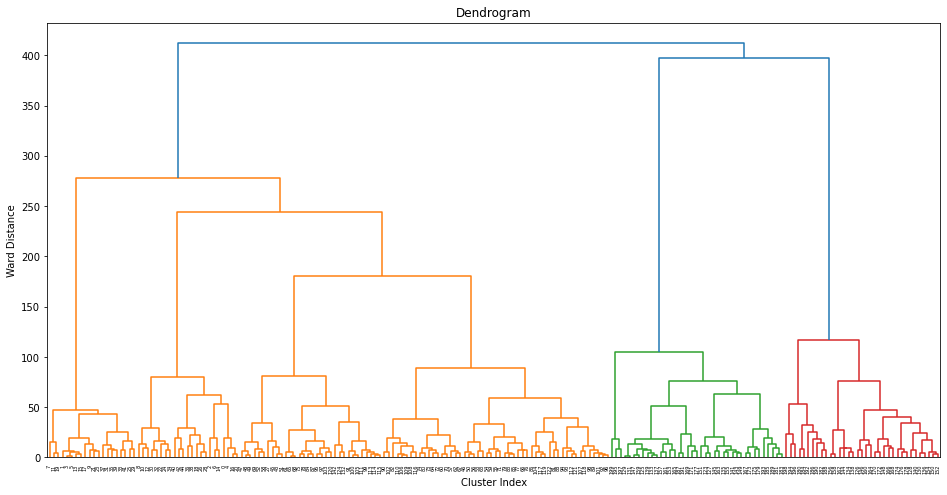

In [20]:
fig = plt.figure(figsize=(16, 8))
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Cluster Index')
plt.ylabel('Ward Distance')
plt.show()